In [ ]:
pip install -U imbalanced-learn

In [ ]:
#importing all required libraries
import numpy as np
import pandas as pd
import sklearn as sk
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the dataset
dataset=pd.read_csv('Iranian Churn.csv')
dataset

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3145         721.980      0  
3146         261.210      0  
3147         280.320      0  
3148        1077.640      0  
3149         100.680      1  

[3150 rows x 14 columns]

In [ ]:
# retrieving the dimensions of the dataset
dataset.shape

(3150, 14)

In [ ]:
dataset.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [ ]:
dataset.tail()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
3145          721.98      0  
3146          261.21      0  
3147          280.32      0  
3148         1077.64      0  
3149          100.68      1

In [ ]:
#printing a concise summary of the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
#returning a statistical description of the data in the DataFrame
dataset.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

In [ ]:
#returning a statistical description of the data in all columns of the DataFrame
dataset.describe(include='all')

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

In [ ]:
#inspecting the presence of null values
dataset.iloc[:,:].isnull().values.any()

False

#series of scatterplots for each pair of variables and a histogram for each variable
sns.pairplot(dataset.iloc[:,1:13])

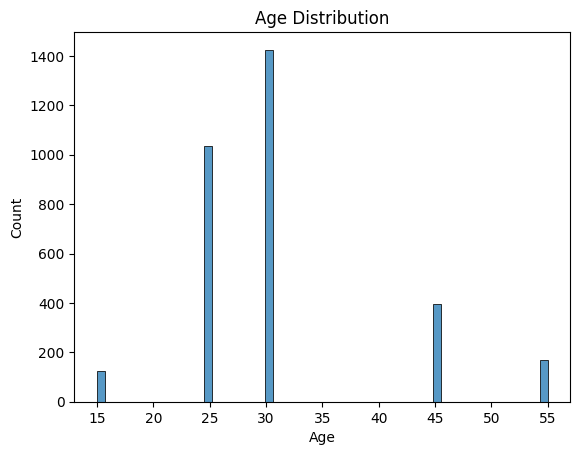

In [ ]:
#plotting the distribution of column Age
sns.histplot(dataset.Age)
plt.title('Age Distribution')
plt.show()

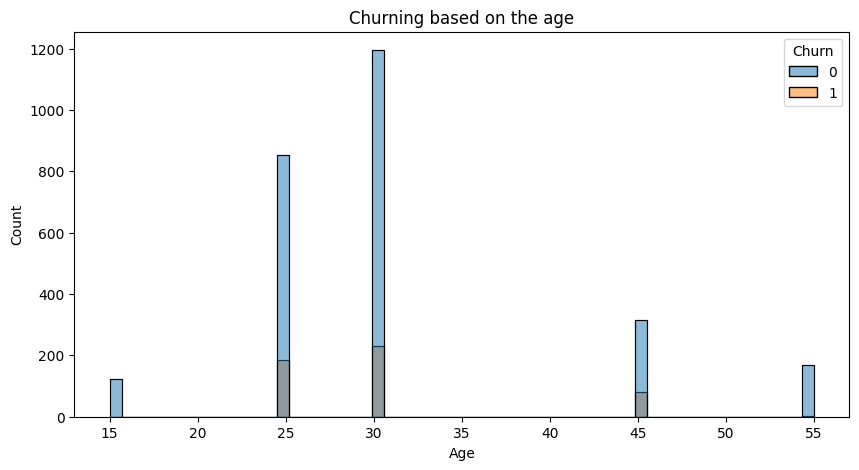

In [ ]:
#explore the age distribution of the people
#who have responded to the social media ads and bought the product and those who haven’t.
plt.figure(figsize=(10,5))
plt.title("Churning based on the age")
sns.histplot(x='Age',hue='Churn',data=dataset)
plt.show()

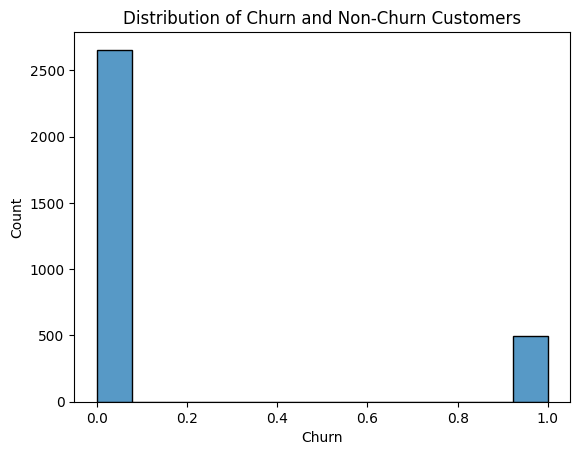

In [ ]:
#plotting the distribution of column Clas
sns.histplot(dataset['Churn'])
plt.title('Distribution of Churn and Non-Churn Customers')
plt.show()

In [ ]:
dataset['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

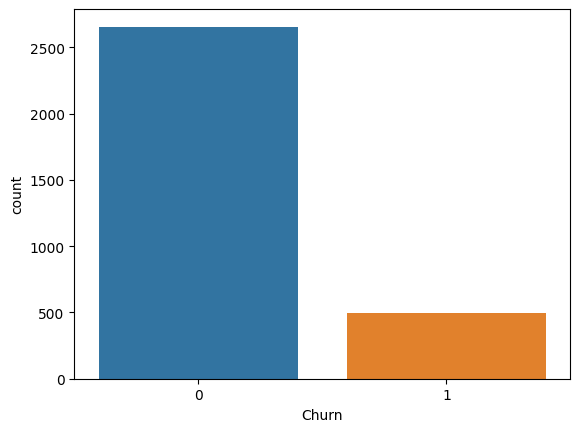

In [ ]:
sns.countplot(dataset,x='Churn')


<Axes: xlabel='Churn', ylabel='Call  Failure'>

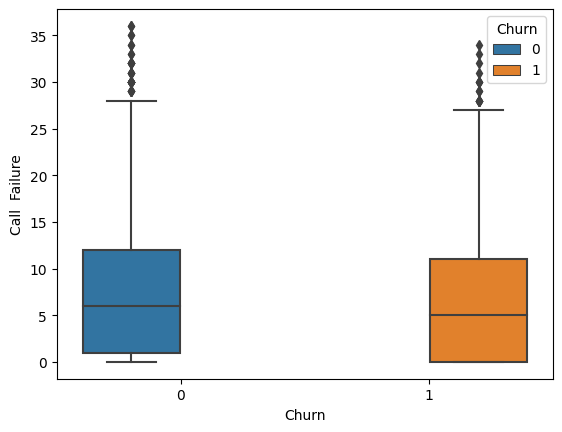

In [ ]:
sns.boxplot(x = 'Churn', y = 'Call  Failure', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Seconds of Use'>

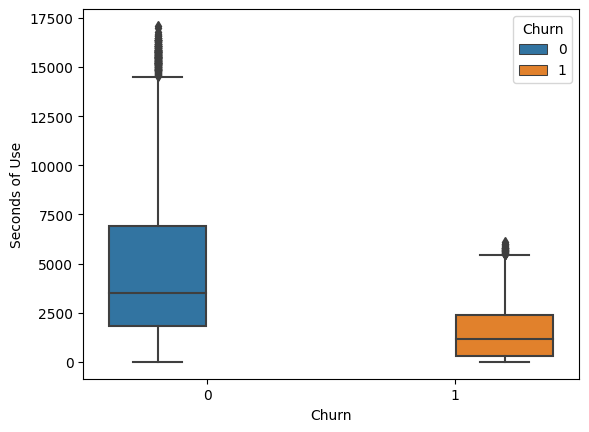

In [ ]:
sns.boxplot(x = 'Churn', y = 'Seconds of Use', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Subscription  Length'>

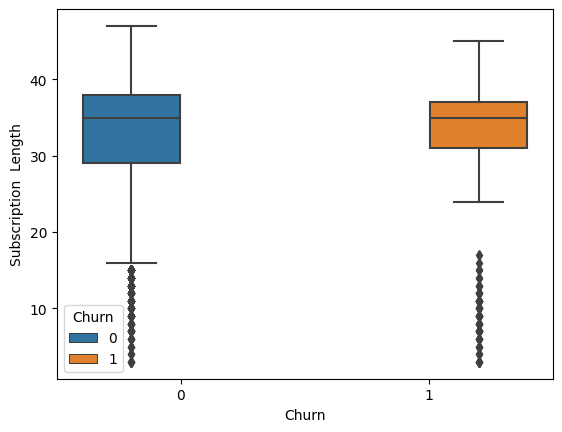

In [ ]:
sns.boxplot(x = 'Churn', y = 'Subscription  Length', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Frequency of use'>

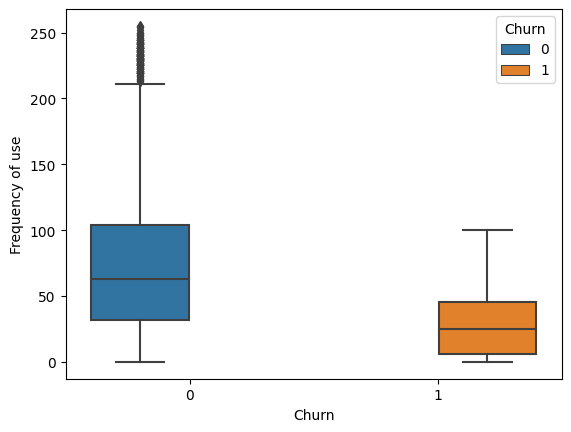

In [ ]:
sns.boxplot(x = 'Churn', y = 'Frequency of use', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Frequency of SMS'>

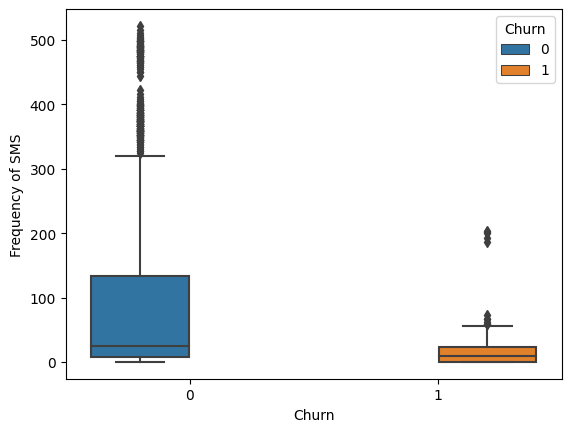

In [ ]:
sns.boxplot(x = 'Churn', y = 'Frequency of SMS', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Distinct Called Numbers'>

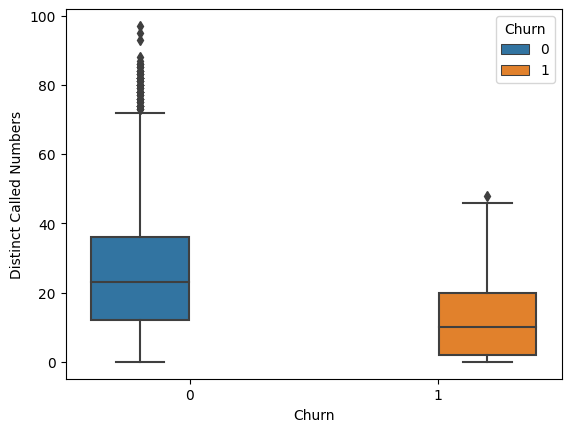

In [ ]:
sns.boxplot(x = 'Churn', y = 'Distinct Called Numbers', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Age'>

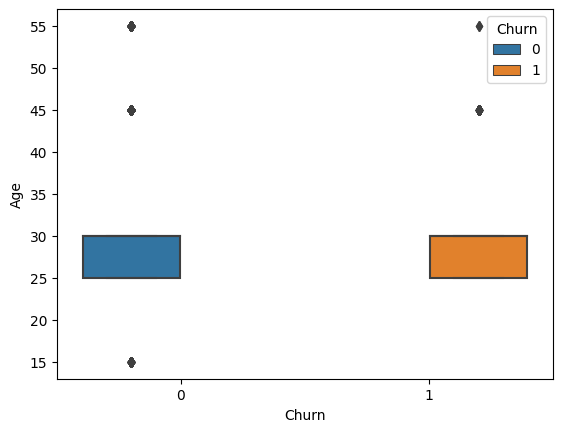

In [ ]:
sns.boxplot(x = 'Churn', y = 'Age', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Customer Value'>

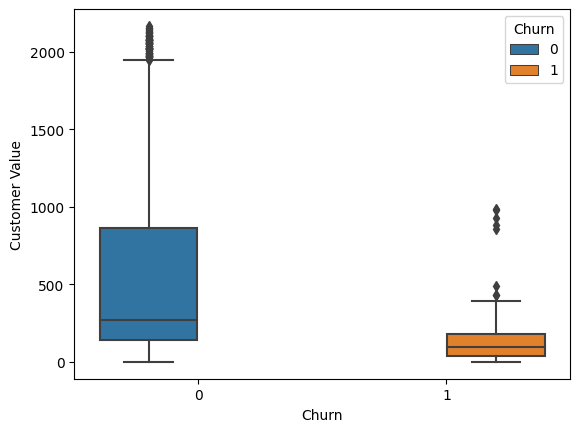

In [ ]:
sns.boxplot(x = 'Churn', y = 'Customer Value', data = dataset, hue = 'Churn')

In [ ]:
# Select the numerical columns where you want to remove outliers
numerical_columns = ['Call  Failure','Subscription  Length','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Customer Value']  # Replace with your actual column names

# Calculate the IQR for each numerical column
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = ((dataset[numerical_columns] < lower_bound) | (dataset[numerical_columns] > upper_bound)).any(axis=1)
dataset= dataset[~outliers]

# Now 'cleaned_df' contains your dataset with outliers removed


<Axes: xlabel='Churn', ylabel='Customer Value'>

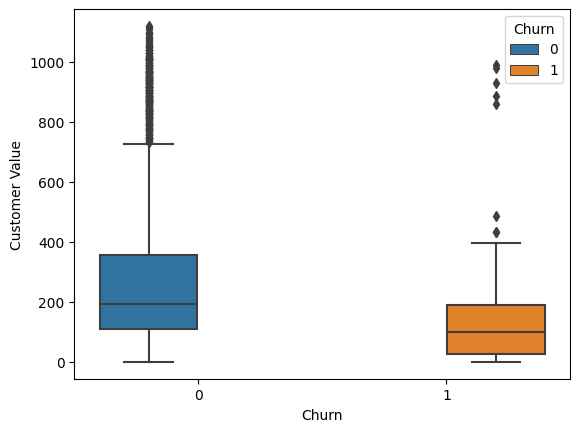

In [ ]:
sns.boxplot(x = 'Churn', y = 'Customer Value', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Distinct Called Numbers'>

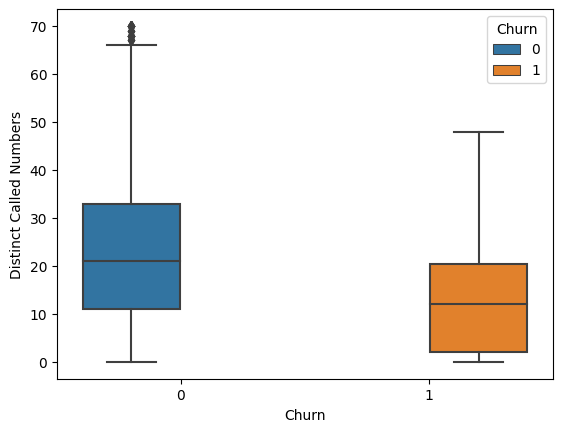

In [ ]:
sns.boxplot(x = 'Churn', y = 'Distinct Called Numbers', data = dataset, hue = 'Churn')

#scatter plots of the independent variables in the dataset
#plt.figure(figsize=(10,5))
#plt.title("Scatter plots of the independent variables")
#sns.histplot(x=['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value'],hue='class',data=dataset)
#plt.show()

sns.pairplot(dataset, hue = 'Churn',vars=['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value'])
plt.show()

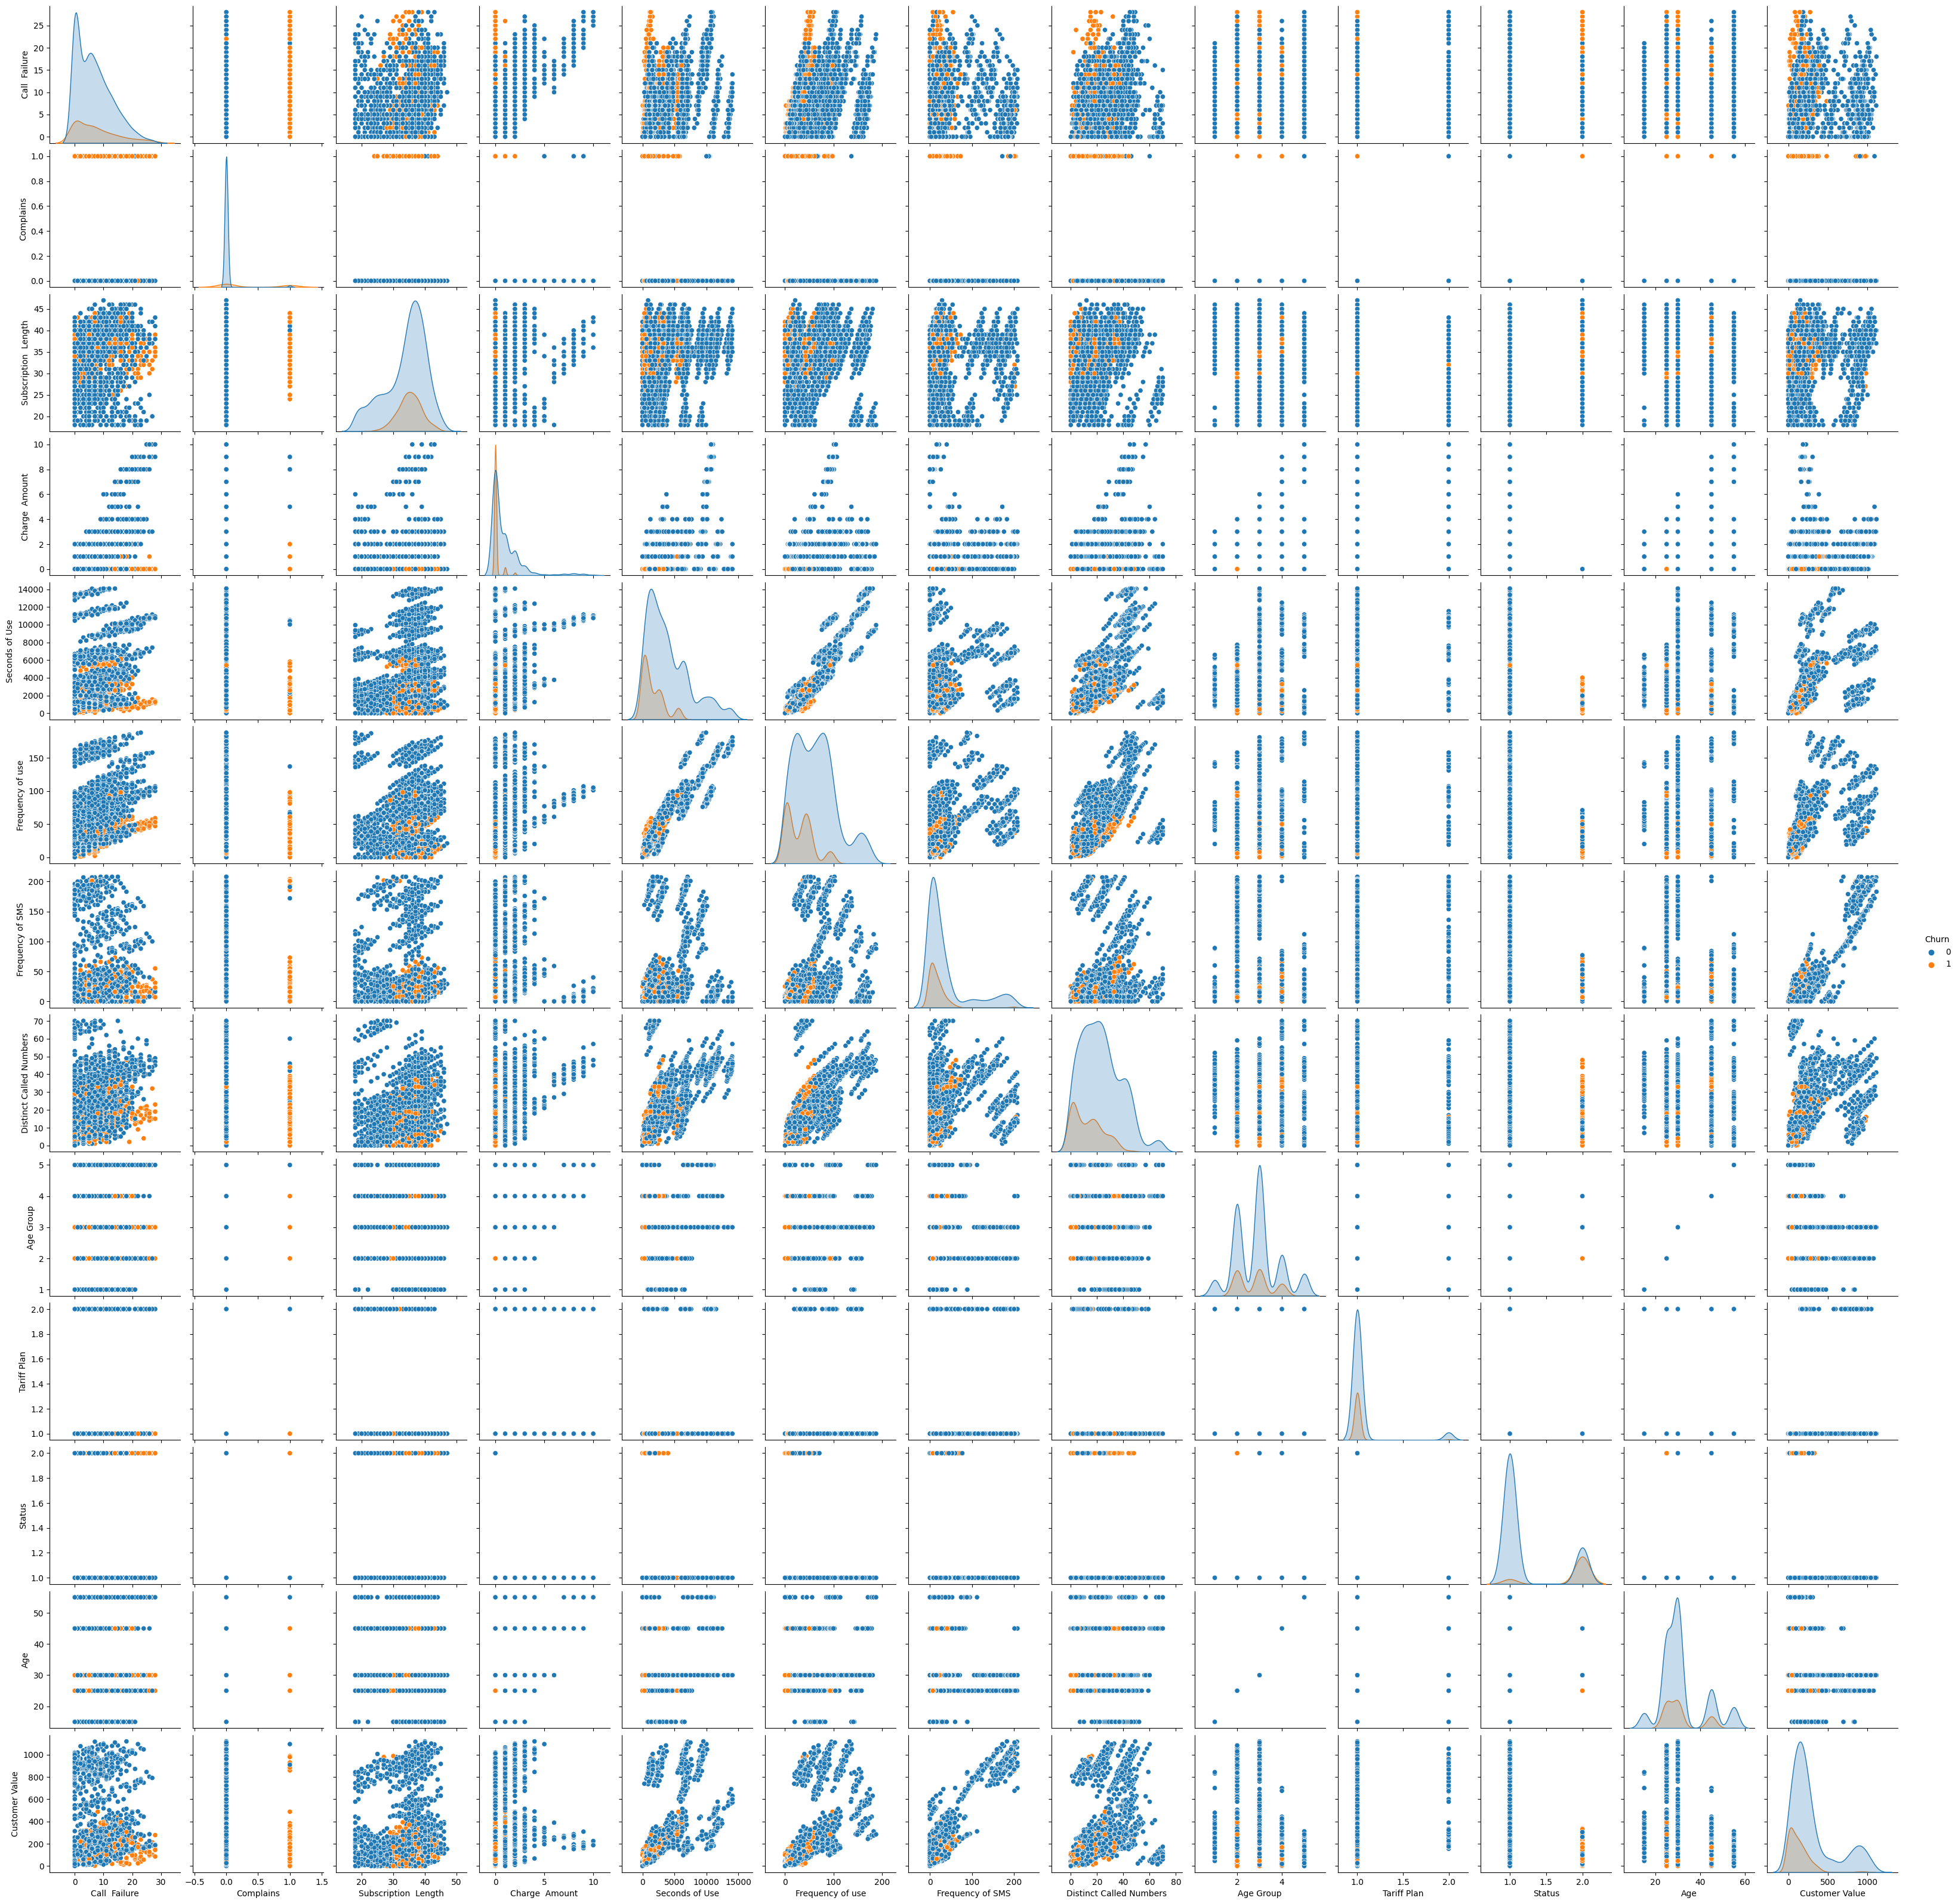

In [ ]:
sns.pairplot(dataset, hue = 'Churn',vars=['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value'])
plt.show()

In [ ]:
# Classification using KNN algorithm

# (a) Determining the class feature and input features:

#In this dataset, 'class' column is the class label or dependent variable,
#other columns  are independent variables or input features.
#first step, slicing data into input and output
X = dataset.drop(columns=['Churn']).values
y = dataset['Churn'].values

In [ ]:
X

array([[  8.   ,   0.   ,  38.   , ...,   1.   ,  30.   , 197.64 ],
       [  0.   ,   0.   ,  39.   , ...,   2.   ,  25.   ,  46.035],
       [ 10.   ,   0.   ,  38.   , ...,   1.   ,  15.   , 240.02 ],
       ...,
       [  7.   ,   0.   ,  20.   , ...,   1.   ,  30.   , 221.28 ],
       [ 21.   ,   0.   ,  19.   , ...,   1.   ,  25.   , 721.98 ],
       [ 13.   ,   0.   ,  18.   , ...,   1.   ,  30.   , 280.32 ]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# (b) Splitting the dataset into the Training set and the Test set:

#data splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [ ]:
#instantiating the selector and setting the variance threshold
#from sklearn.feature_selection import VarianceThreshold
#variance_selector = VarianceThreshold(threshold=0)

In [ ]:
#identifying the features below the variance threshold and transforming training array to remove them
#X_train_fs = variance_selector.fit_transform(X_train)

In [ ]:
#similarly transforming the test dataset
#X_test_fs = variance_selector.transform(X_test)

In [ ]:
#print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

In [ ]:
#Pearson correlation
#plt.figure( figsize=(15, 6))
#cor=X_train_fs.corr()
#cor = np.corrcoef(X_train_fs, rowvar=False)
#sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
#plt.show()

In [ ]:
#import numpy as np

#def correlation(dataset, threshold):
    #col_corr = set()  # Set of all the indices of correlated columns
    #corr_matrix = np.corrcoef(dataset, rowvar=False)
    #for i in range(len(corr_matrix)):
        #for j in range(i):
            #if abs(corr_matrix[i, j]) > threshold: # we are interested in absolute coeff value
                #col_corr.add(i)
                #col_corr.add(j)
    #return col_corr

In [ ]:
#corr_features = correlation(X_train_fs, 0.7)
#len(set(corr_features))

In [ ]:
#corr_features

In [ ]:
#X_train_fs=np.delete(X_train_fs, list(corr_features), axis=1)
#X_test_fs=np.delete(X_test_fs, list(corr_features), axis=1)

In [ ]:
# Using the SelectKBest selector from sklearn to select the k features with the best scores on a selected test statistic
#from sklearn.feature_selection import SelectKBest, f_classif
#selector = SelectKBest(f_classif, k=4)
#X_train_fs = selector.fit_transform(X_train_fs, y_train)
#X_test_fs = selector.transform(X_test_fs)

# Creaing boolean array for all features
new_features_indices =variance_selector.get_support(indices=True)[selector.get_support()]
new_features_boolean = np.isin(np.arange(13), new_features_indices)
new_features_boolean

<Axes: ylabel='count'>

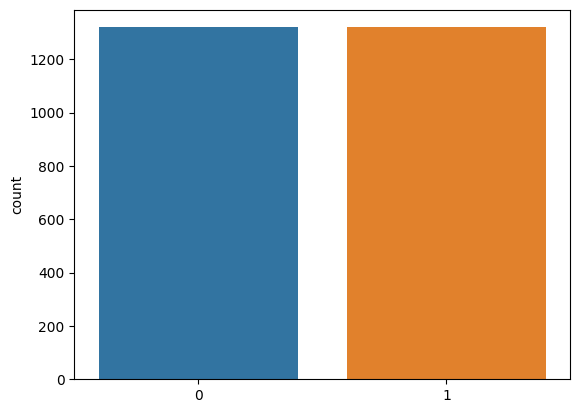

In [ ]:
#class imbalance correction using SMOTE
from imblearn.over_sampling import SMOTE
resampler=SMOTE(random_state=0)
X_train_smote,y_train_smote=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_smote)

In [ ]:
#importing from Scikit Learn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

In [ ]:
# (c) Scaling features:
# Standardising data before passing to model
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [ ]:
#transforming the training dataset and test dataset
# Use RandomForestClassifier as the base model
rf = RandomForestClassifier(random_state=0)
rfecv = RFECV(rf, cv=5, step=1)
X_train_smote = rfecv.fit_transform(X_train_smote,y_train_smote)
X_test = rfecv.transform(X_test)
print(f"Number of remaining features: {X_train_smote.shape[1]}")

Number of remaining features: 12


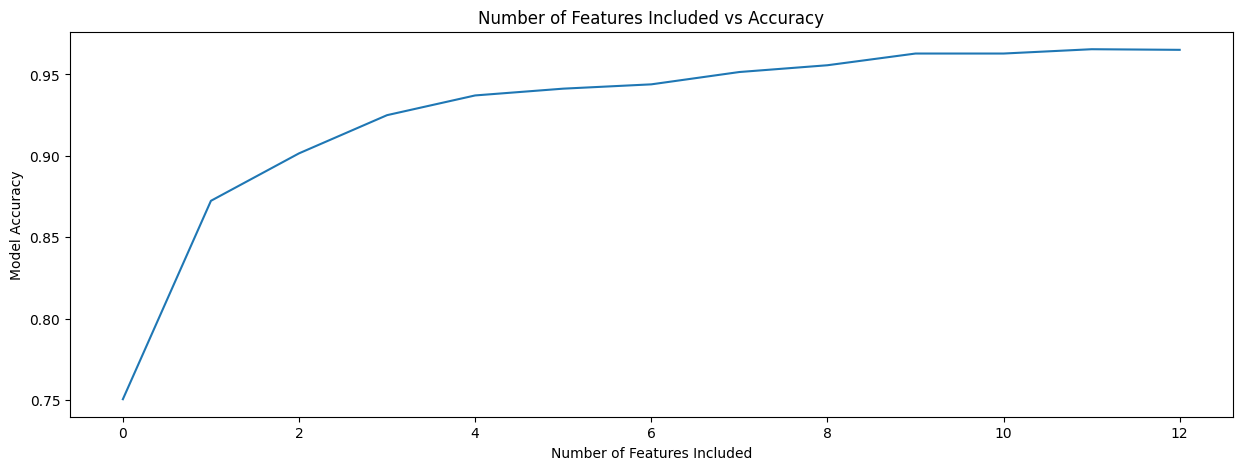

In [ ]:
#plotting the model accuracy against the number of features
plt.figure( figsize=(15, 5))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
#plt.plot(np.linspace(0,8,1), rfecv.cv_results_['mean_test_score'])
plt.plot(rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(7,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 91        
                                                                 
 dense_1 (Dense)             (None, 2)                 16        
                                                                 
Total params: 107 (428.00 Byte)
Trainable params: 107 (428.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_smote,y_train_smote, \
                    batch_size = 32, epochs = 100, \
                    verbose=2,validation_split=0.2
                    )

Epoch 1/100
66/66 - 1s - loss: 0.7018 - accuracy: 0.6136 - val_loss: 0.7486 - val_accuracy: 0.4375 - 955ms/epoch - 14ms/step
Epoch 2/100
66/66 - 0s - loss: 0.5426 - accuracy: 0.7273 - val_loss: 0.7060 - val_accuracy: 0.4962 - 183ms/epoch - 3ms/step
Epoch 3/100
66/66 - 0s - loss: 0.4699 - accuracy: 0.7571 - val_loss: 0.6607 - val_accuracy: 0.5417 - 229ms/epoch - 3ms/step
Epoch 4/100
66/66 - 0s - loss: 0.4276 - accuracy: 0.7680 - val_loss: 0.6157 - val_accuracy: 0.5644 - 193ms/epoch - 3ms/step
Epoch 5/100
66/66 - 0s - loss: 0.3964 - accuracy: 0.7822 - val_loss: 0.5745 - val_accuracy: 0.6080 - 181ms/epoch - 3ms/step
Epoch 6/100
66/66 - 0s - loss: 0.3733 - accuracy: 0.8196 - val_loss: 0.5403 - val_accuracy: 0.6932 - 225ms/epoch - 3ms/step
Epoch 7/100
66/66 - 0s - loss: 0.3560 - accuracy: 0.8490 - val_loss: 0.5004 - val_accuracy: 0.7973 - 191ms/epoch - 3ms/step
Epoch 8/100
66/66 - 0s - loss: 0.3412 - accuracy: 0.8546 - val_loss: 0.4623 - val_accuracy: 0.8390 - 228ms/epoch - 3ms/step
Epoch 9

In [ ]:
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

X_train_smote shape: (2640, 12)
y_train_smote shape: (2640,)


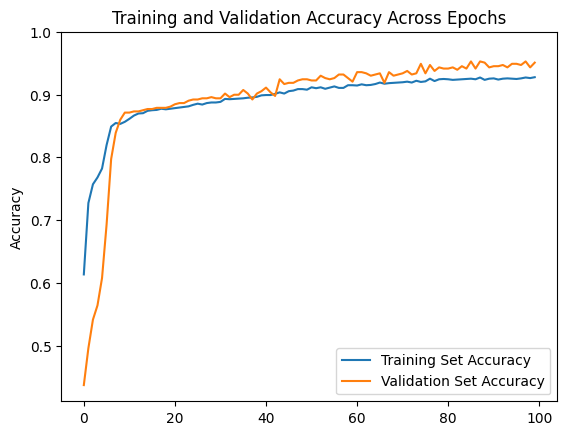

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

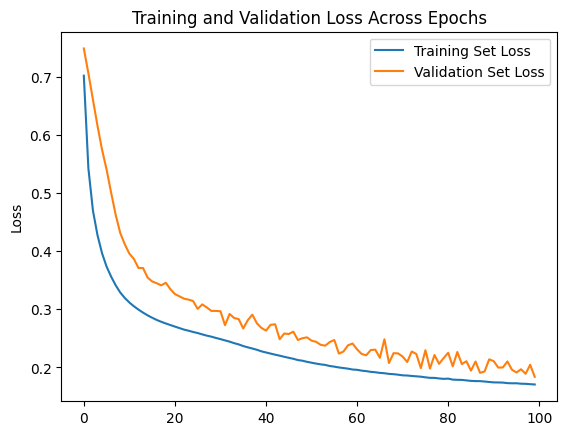

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

22/22 [==============================] - 0s 2ms/step


Accuracy Score: 91.63%


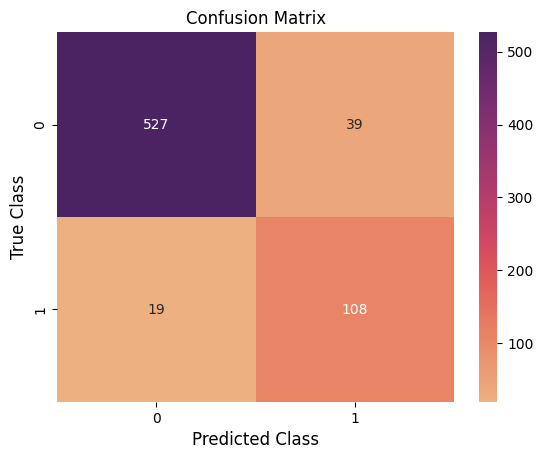


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       566
           1       0.73      0.85      0.79       127

    accuracy                           0.92       693
   macro avg       0.85      0.89      0.87       693
weighted avg       0.92      0.92      0.92       693



In [ ]:
#evaluating using accuracy_score and confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

from sklearn import metrics
result=metrics.classification_report(y_test,y_pred)
print('\nClassification Report:\n')
print(result)

22/22 [==============================] - 0s 2ms/step
AUC Score: 0.97


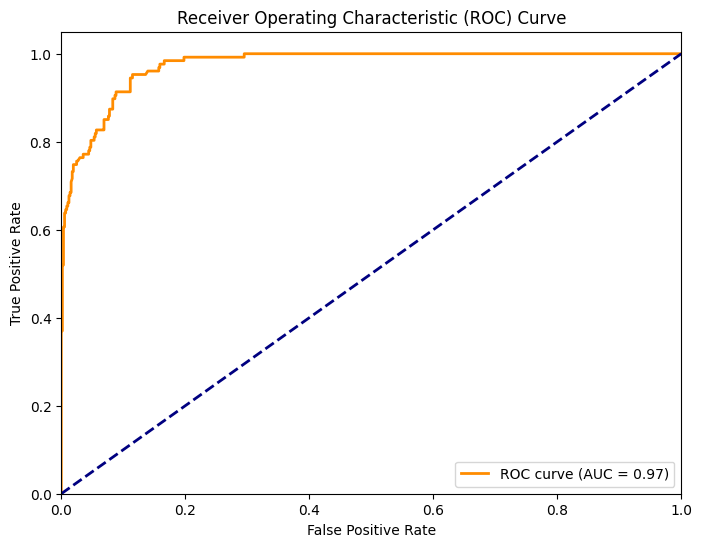

In [ ]:
# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
